In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('data7_data3.npy')
re_data=data.reshape(-1,100*100)
re_data.shape


(300, 10000)

In [14]:
from sklearn.decomposition import PCA#분석을 이용한 정비
pca = PCA(n_components=50)
rr_data=pca.fit_transform(re_data)

In [15]:
pca.components_.shape

(50, 10000)

In [10]:
def f(data,r=1):
    n=len(data)
    rows=int(np.ceil(n/10))
    cols=n if rows < 2 else 10#전달의 목적
    fig,axs= plt.subplots(rows,cols,figsize=(cols*r,rows*r))
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(data[i*10+j],cmap='gray_r')#axs단일데이터[좌표]
            axs[i,j].axis('off')
    plt.show()

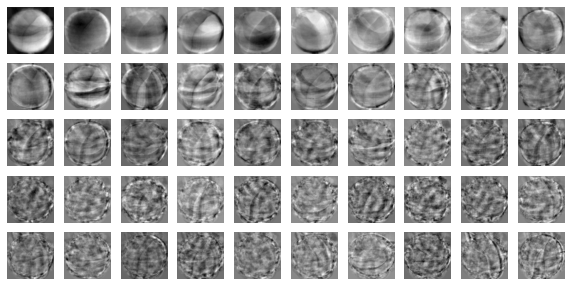

In [11]:
f(pca.components_.reshape(-1,100,100))#정보값들ㅇ르 이미지화작업

In [12]:
rr_data.shape

(300, 50)

In [20]:
k=pca.inverse_transform(rr_data).shape

In [ ]:
f(k[0:100])

In [22]:
np.sum(pca.explained_variance_ratio_)#분산값

0.9215080016579182

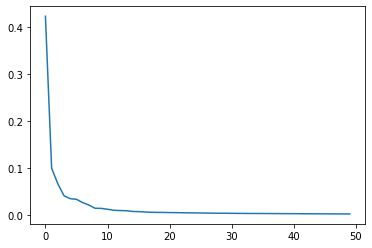

In [23]:
plt.plot(pca.explained_variance_ratio_)

In [27]:
#로지스틱은 결과값 y가 있어야함
y=np.array([0]*100+[1]*100+[2]*100)
x=rr_data

In [32]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
m= LogisticRegression()
from sklearn.model_selection import cross_validate#검증하기위해선 validate 사용
sc=cross_validate(m,x,y,cv=5)
print(np.mean(sc['test_score']))
print(np.mean(sc['fit_time']))
sc=cross_validate(m,re_data,y,cv=5)
print(np.mean(sc['test_score']))
print(np.mean(sc['fit_time']))

1.0
0.04101176261901855
0.9966666666666667
0.5898071765899658
